In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
import statsmodels.api as sm

# Load, Join and Filter the Data

In [2]:
df_apples = pd.read_csv("../data/processed/apple-consumption.csv")
df_visits = pd.read_csv("../data/processed/doctor-visits.csv")

In [3]:
df = pd.merge(df_apples, df_visits, on=["country", "year"])

In [4]:
# We consider the year that had the most data
chosen_year = 2017
df = df[df["year"] == chosen_year].reset_index(drop=True)

# Utils

In [5]:
def set_plot_labels(
    ax: Axes, 
    xlabel: str | None = None, 
    ylabel: str | None = None, 
    title: str | None = None
) -> None:
    """
    Set labels and title for a matplotlib plot.

    Parameters:
    ax (Axes): The matplotlib axes object to modify.
    xlabel (str | None, optional): The label for the x-axis. Default is None.
    ylabel (str | None, optional): The label for the y-axis. Default is None.
    title (str | None, optional): The title of the plot. Default is None.

    Returns:
    None
    """
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_title(title, fontsize=14)

In [6]:
figsize = (10, 5)

# Data Visualization

In [7]:
df["apple_consumption_per_capita_kg"].describe()

count    42.000000
mean     16.210938
std      11.433078
min       0.849999
25%       7.337501
50%      15.285003
75%      22.857501
max      57.189995
Name: apple_consumption_per_capita_kg, dtype: float64

In [8]:
df["doctor_visits_per_capita"].describe()

count    42.000000
mean      7.323810
std       3.746335
min       0.700000
25%       4.525000
50%       7.050000
75%       9.450000
max      18.200000
Name: doctor_visits_per_capita, dtype: float64

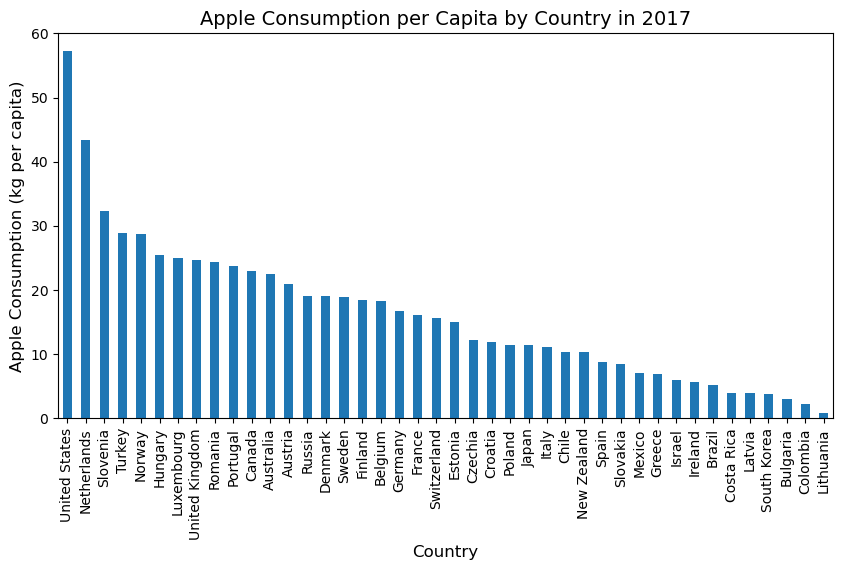

In [9]:
ax = df.sort_values(by="apple_consumption_per_capita_kg", ascending=False).plot(
    x="country", 
    y="apple_consumption_per_capita_kg", 
    kind="bar", 
    figsize=figsize,
    legend=False,
)

set_plot_labels(
    ax=ax,
    xlabel="Country",
    ylabel="Apple Consumption (kg per capita)",
    title=f"Apple Consumption per Capita by Country in {chosen_year}",
)
plt.xticks(rotation=90)
plt.show()

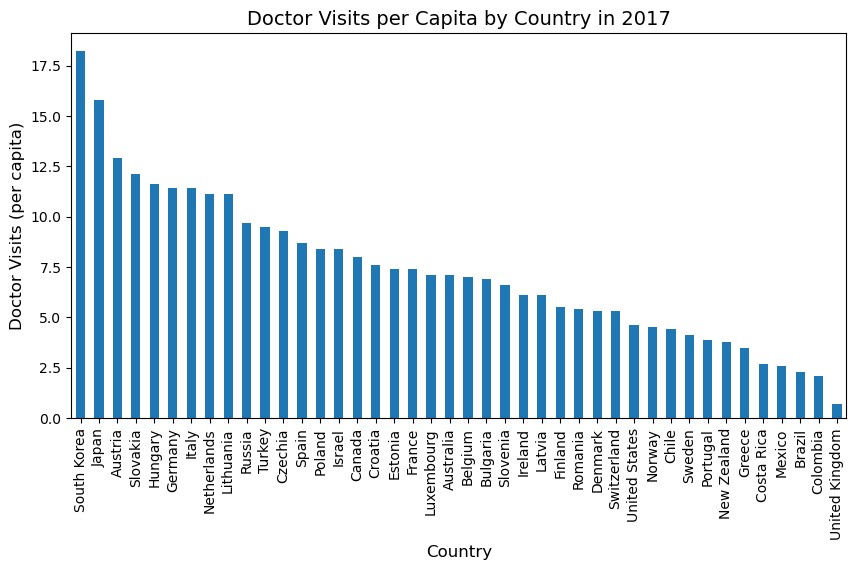

In [10]:
ax = df.sort_values(by="doctor_visits_per_capita", ascending=False).plot(
    x="country", 
    y="doctor_visits_per_capita", 
    kind="bar", 
    figsize=figsize,
    legend=False,
)

set_plot_labels(
    ax=ax,
    xlabel="Country",
    ylabel="Doctor Visits (per capita)",
    title=f"Doctor Visits per Capita by Country in {chosen_year}",
)
plt.xticks(rotation=90)
plt.show()

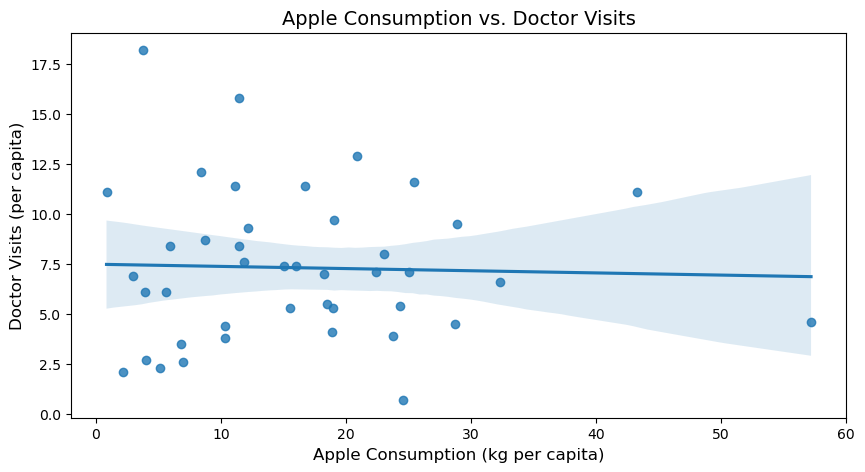

In [11]:
fig, ax = plt.subplots(figsize=figsize)

sns.regplot(
    data=df,
    x="apple_consumption_per_capita_kg",
    y="doctor_visits_per_capita",
    ax=ax,
)

set_plot_labels(
    ax=ax,
    xlabel="Apple Consumption (kg per capita)",
    ylabel="Doctor Visits (per capita)",
    title="Apple Consumption vs. Doctor Visits",
)

# Data Analysis

## Naïve Model

In [12]:
X = df["apple_consumption_per_capita_kg"]
y = df["doctor_visits_per_capita"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     doctor_visits_per_capita   R-squared:                       0.001
Model:                                  OLS   Adj. R-squared:                 -0.024
Method:                       Least Squares   F-statistic:                   0.04401
Date:                      Thu, 16 Jan 2025   Prob (F-statistic):              0.835
Time:                              15:32:19   Log-Likelihood:                -114.54
No. Observations:                        42   AIC:                             233.1
Df Residuals:                            40   BIC:                             236.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               7.4999      1.023      7.330      0.000       5.432       9.568
apple_consumption_per_capita_kg    -0.0109      0.052     -0.210      0.835      -0.116       0.094
==============================================================================
Omnibus:                        4.505   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                3.407
Skew:                           0.672   Prob(JB):                        0.182
Kurtosis:                       3.372   Cond. No.                         34.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## With Confounders

In [13]:
df_gdp = pd.read_csv("../data/processed/gdp.csv")
df_age = pd.read_csv("../data/processed/median-age.csv")

In [14]:
df = df.merge(df_gdp, on=["country", "year"]).merge(df_age, on=["country", "year"])

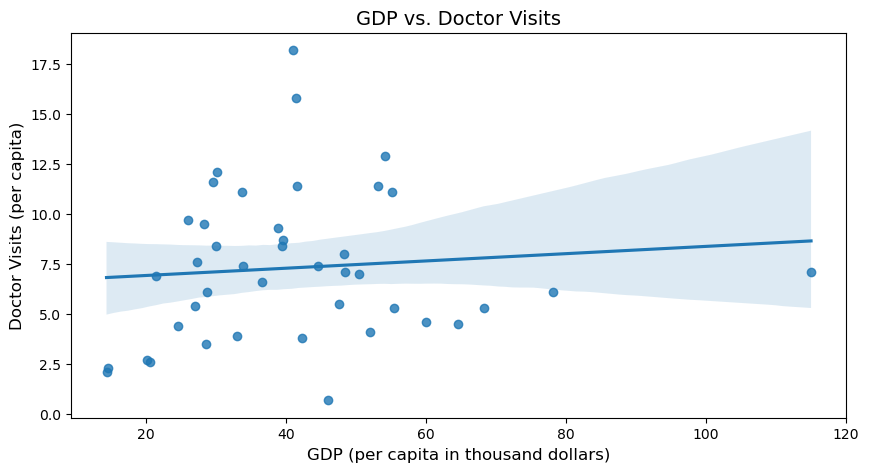

In [15]:
fig, ax = plt.subplots(figsize=figsize)

sns.regplot(
    data=df,
    x="gdp_per_capita_k",
    y="doctor_visits_per_capita",
    ax=ax,
)

set_plot_labels(
    ax=ax,
    xlabel="GDP (per capita in Thousand dollars)",
    ylabel="Doctor Visits (per capita)",
    title="GDP vs. Doctor Visits",
)

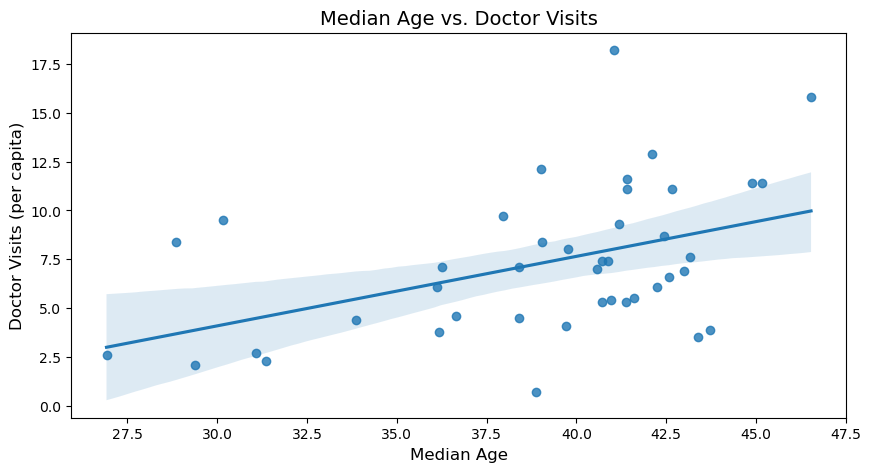

In [16]:
fig, ax = plt.subplots(figsize=figsize)

sns.regplot(
    data=df,
    x="median_age",
    y="doctor_visits_per_capita",
    ax=ax,
)

set_plot_labels(
    ax=ax,
    xlabel="Median Age",
    ylabel="Doctor Visits (per capita)",
    title="Median Age vs. Doctor Visits",
)

In [17]:
X = df[["apple_consumption_per_capita_kg", "gdp_per_capita_k", "median_age"]]
y = df["doctor_visits_per_capita"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     doctor_visits_per_capita   R-squared:                       0.209
Model:                                  OLS   Adj. R-squared:                  0.146
Method:                       Least Squares   F-statistic:                     3.345
Date:                      Thu, 16 Jan 2025   Prob (F-statistic):             0.0290
Time:                              15:32:19   Log-Likelihood:                -109.64
No. Observations:                        42   AIC:                             227.3
Df Residuals:                            38   BIC:                             234.2
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -6.4767      4.523     -1.432      0.160     -15.634       2.680
apple_consumption_per_capita_kg    -0.0330      0.052     -0.638      0.527      -0.138       0.072
gdp_per_capita_k                    0.0068      0.032      0.212      0.834      -0.059       0.072
median_age                          0.3595      0.117      3.060      0.004       0.122       0.597
==============================================================================
Omnibus:                        4.543   Durbin-Watson:                   2.371
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                3.418
Skew:                           0.670   Prob(JB):                        0.181
Kurtosis:                       3.400   Cond. No.                         518.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

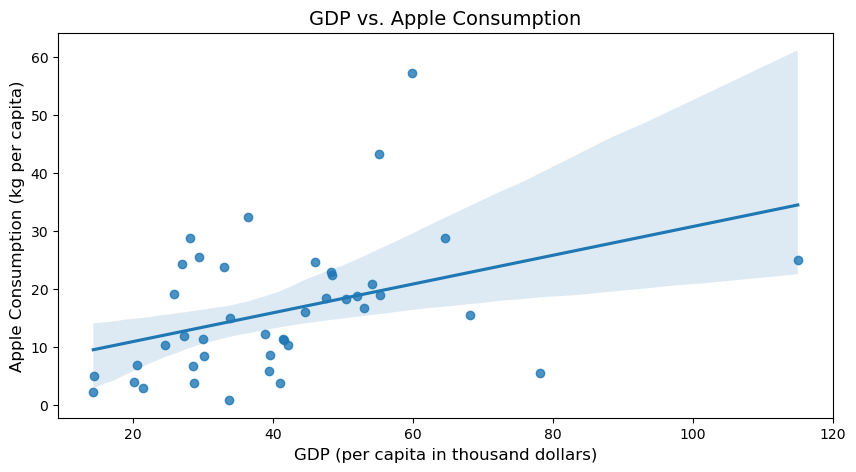

In [18]:
fig, ax = plt.subplots(figsize=figsize)

sns.regplot(
    data=df,
    x="gdp_per_capita_k",
    y="apple_consumption_per_capita_kg",
    ax=ax,
)

set_plot_labels(
    ax=ax,
    xlabel="GDP (per capita in Thousand dollars)",
    ylabel="Apple Consumption (kg per capita)",
    title="GDP vs. Apple Consumption",
)

In [19]:
X = df["gdp_per_capita_k"]
y = df["apple_consumption_per_capita_kg"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     apple_consumption_per_capita_kg   R-squared:                       0.163
Model:                                         OLS   Adj. R-squared:                  0.142
Method:                              Least Squares   F-statistic:                     7.766
Date:                             Thu, 16 Jan 2025   Prob (F-statistic):            0.00810
Time:                                     15:32:20   Log-Likelihood:                -157.70
No. Observations:                               42   AIC:                             319.4
Df Residuals:                                   40   BIC:                             322.9
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.9915      4.015      1.492      0.143      -2.123      14.106
gdp_per_capita_k     0.2477      0.089      2.787      0.008       0.068       0.427
==============================================================================
Omnibus:                       16.198   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.023
Skew:                           1.255   Prob(JB):                     4.49e-05
Kurtosis:                       5.268   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""